In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

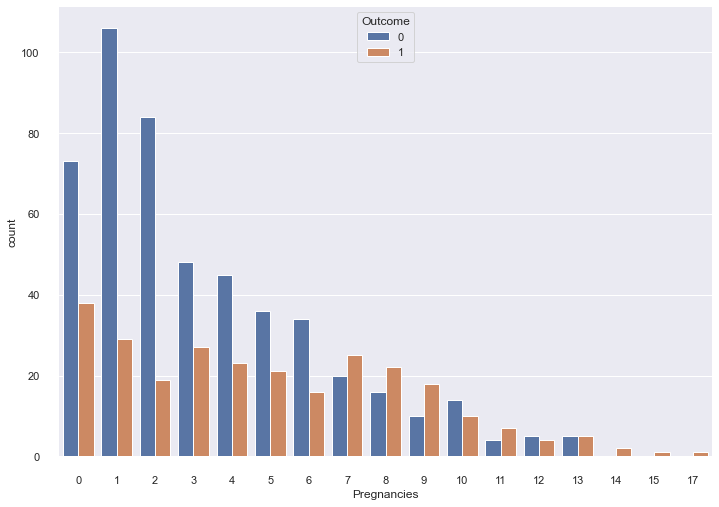

In [6]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('Pregnancies',data=data,hue='Outcome')
sns.despine(offset=10, trim=True)

In [7]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

In [8]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [11]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train , y_train.ravel())

SVC()

In [12]:
y_pred = svc.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       107
           1       0.64      0.45      0.52        47

    accuracy                           0.75       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.74      0.75      0.74       154



In [15]:
y_train_pred = svc.predict(X_train)
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       393
           1       0.68      0.45      0.54       221

    accuracy                           0.73       614
   macro avg       0.71      0.67      0.67       614
weighted avg       0.72      0.73      0.71       614



In [16]:
from mlxtend.plotting import plot_decision_regions

Text(0.5, 1.0, 'Logistic Regression with LDA ( Train Set)')

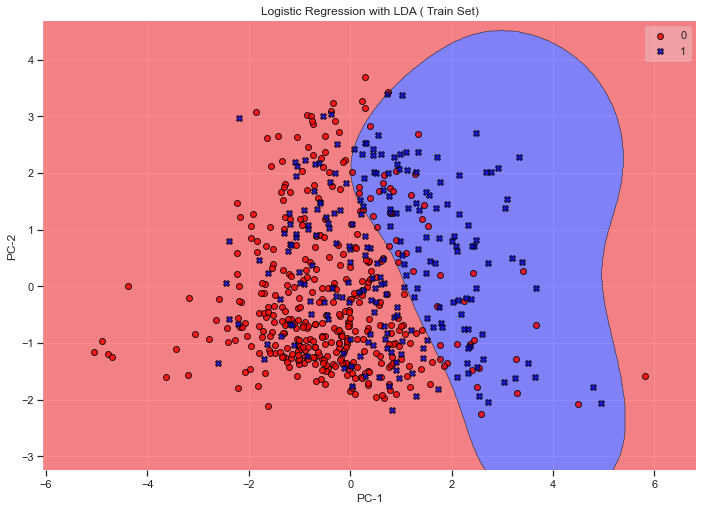

In [17]:
plot_decision_regions(X_train , y_train.reshape(y_train.shape[0]) , svc ,colors='red,blue' , markers='oXv')
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.title("Logistic Regression with LDA ( Train Set)")

Text(0.5, 1.0, 'Logistic Regression with LDA ( Test Set)')

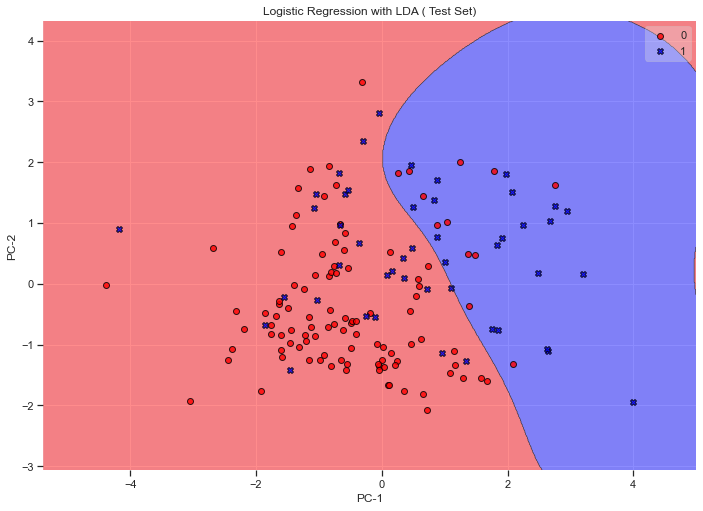

In [18]:
plot_decision_regions(X_test , y_test.reshape(y_test.shape[0]) , svc ,colors='red,blue' , markers='oXv')
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.title("Logistic Regression with LDA ( Test Set)")

In [19]:
train_cm = confusion_matrix(y_train , y_train_pred)
test_cm = confusion_matrix(y_test , y_pred)

In [20]:
from mlxtend.plotting import plot_confusion_matrix

Text(0.5, 1.05, 'Confusion Matrix For Train Data')

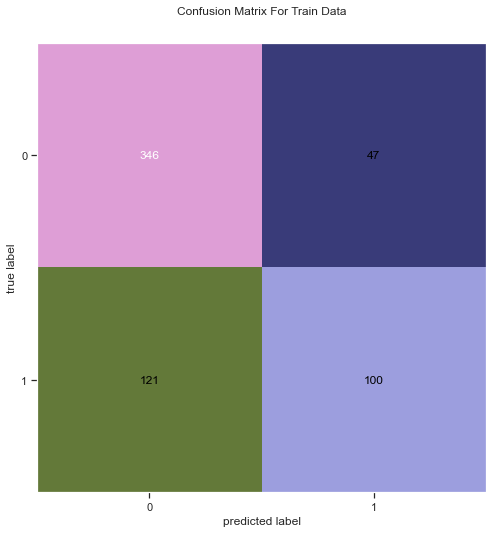

In [21]:
plot_confusion_matrix(train_cm , cmap = 'tab20b')
plt.title('Confusion Matrix For Train Data')

Text(0.5, 1.05, 'Confusion Matrix For Test Data')

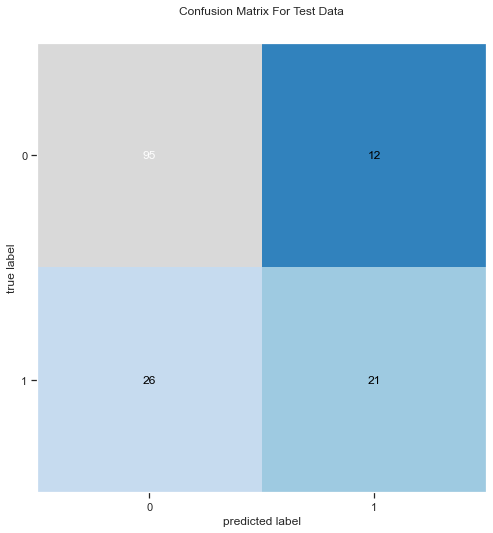

In [22]:
plot_confusion_matrix(test_cm , cmap = 'tab20c')
plt.title('Confusion Matrix For Test Data')